In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [3]:
train_images = train_images.reshape((60000, 28, 28, 1)).astype("float32") / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)).astype("float32") / 255.0

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

c:\Users\syjwk\anaconda3\envs\tf310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
history = model.fit(
    train_images, train_labels,
    epochs=5,
    validation_data=(test_images, test_labels)
)

# 정확도 값 추출
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8923 - loss: 0.3420 - val_accuracy: 0.9865 - val_loss: 0.0433
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9846 - loss: 0.0477 - val_accuracy: 0.9852 - val_loss: 0.0429
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9896 - loss: 0.0343 - val_accuracy: 0.9891 - val_loss: 0.0318
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9928 - loss: 0.0230 - val_accuracy: 0.9884 - val_loss: 0.0366
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9935 - loss: 0.0194 - val_accuracy: 0.9900 - val_loss: 0.0292


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# 2. 예측 및 정답 저장
all_labels = test_labels
all_predictions = np.argmax(model.predict(test_images), axis=1)

# 3. 혼동 행렬 및 기본 평가 지표 계산
conf_matrix = confusion_matrix(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')

# 4. 클래스별 Specificity 계산
specificity = []
with np.errstate(divide='ignore', invalid='ignore'):
    for i in range(conf_matrix.shape[0]):
        tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
        fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
        spec = tn / (tn + fp) if (tn + fp) > 0 else 0.0
        specificity.append(spec)

# 5. 결과 출력
print("=== 모델 평가 결과 ===")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"F1 Score      : {f1:.4f}")
print(f"Precision     : {precision:.4f}")
print(f"Recall        : {recall:.4f}")
print(f"Specificity   : {np.mean(specificity):.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
=== 모델 평가 결과 ===
Confusion Matrix:
[[ 974    1    2    0    0    0    2    1    0    0]
 [   0 1131    0    1    0    1    1    0    1    0]
 [   0    1 1028    2    0    0    0    1    0    0]
 [   0    0    1 1004    0    4    0    0    1    0]
 [   0    1    0    0  976    0    1    0    1    3]
 [   1    0    0    3    0  882    4    1    0    1]
 [   1    2    0    0    1    5  948    0    1    0]
 [   0   13    5    2    0    0    0 1006    0    2]
 [   0    0    2    1    0    1    0    1  968    1]
 [   0    4    1    3    4    6    0    4    4  983]]
F1 Score      : 0.9900
Precision     : 0.9900
Recall        : 0.9900
Specificity   : 0.9989


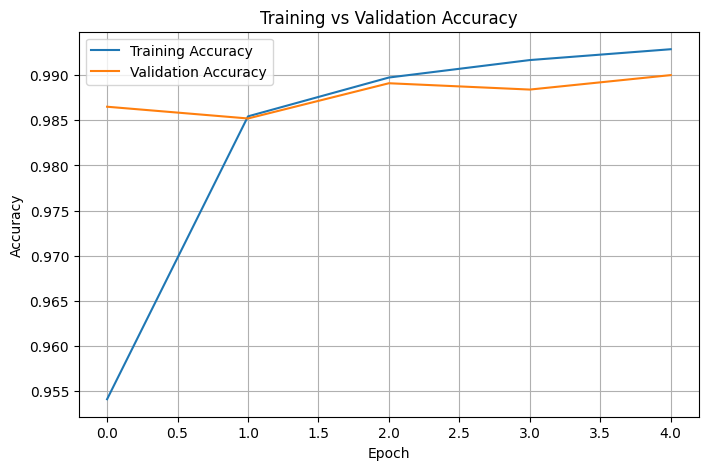

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()
